**Sentiment analysis**

Hello and welcome to my sentiment analysis project. This will be conducted on a spotify reviews dataset that contain reviews about the application. The csv-file is split into two columns, the first contains a review and the second column contains a label about the general sentiment of the review.

The sentiment analysis practice we will be applying in this project is the NLTKS VADER teqnique.

Sentiment analysis is a powerful data analysation tool that enables insight into the sentiment of a text. The two first essential steps of the process is the following for VADER: 

    1. Tokenizing the string. The process of breaking up each review into the words that make it up and populating a list.
    2. Part of speech. The process of labeling each token with it's corresponding grammatical category. 


**Import neccesary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
df = pd.read_csv("/kaggle/input/spotify-dataset/DATASET.csv")
df.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


Lets first explore the dataset! We want to get an overview of the proportion of positive/negative reviews and also explore some example reviews.

Given that our label column contains categorial values we first need to perform a get_dummies operation. This  creates two new columns with boolean values that is true/false if the value is present in the row. This allows us to aggregate it in a piechart.

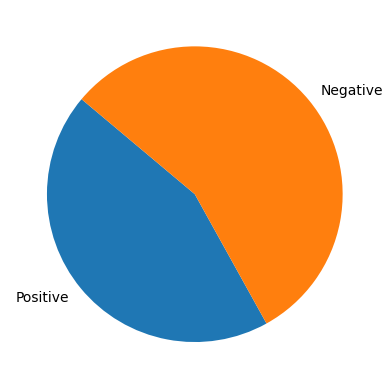

In [4]:
dummy_df = pd.get_dummies(df['label'])
dummy_df.head()

Positive, Negative = dummy_df['POSITIVE'].sum(), dummy_df['NEGATIVE'].sum()
data, labels = [Positive, Negative], ["Positive", "Negative"] 

fig, ax = plt.pie(data, labels = labels, startangle = 140)
plt.show()


In [5]:
randomInt = random.randint(0,500)
example = df['Review'][randomInt]
print(f"The review number: {randomInt}", example)

The review number: 421 Just had to sit through 6 adds straight as a free user only to it to play a completely different song than the one I clicked on.


Lets do some tokenization, first we need to download the nltk data for tokenization. Then we will perform a tokenization on an example review.

In [6]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [7]:
example_tokenized = word_tokenize(example)
example_tokenized

['Just',
 'had',
 'to',
 'sit',
 'through',
 '6',
 'adds',
 'straight',
 'as',
 'a',
 'free',
 'user',
 'only',
 'to',
 'it',
 'to',
 'play',
 'a',
 'completely',
 'different',
 'song',
 'than',
 'the',
 'one',
 'I',
 'clicked',
 'on',
 '.']

Now we need to apply part of speech on the tokenized review. This ensures that words are put in their correct grammatical category by labeling them with a two letter code. This is an important step seeing that the english language has many words that can be used in different grammatical context. For example the word 'run' can, depending on the context, be a:

    1. Verb - I run every morning
    2. Adjective - We did a test run of the system yesterday.

After this we will chunk it to a chunk object. What this does is grouping together the tokenized review, that has been tagged by POS, into a chunk of words so it actually forms a sentance.

In [8]:
pos_example = nltk.pos_tag(example_tokenized)
pos_example
pos_example_chunk = nltk.chunk.ne_chunk(pos_example)
pos_example_chunk.pprint()

(S
  Just/RB
  had/VBD
  to/TO
  sit/VB
  through/IN
  6/CD
  adds/VBZ
  straight/VBN
  as/IN
  a/DT
  free/JJ
  user/NN
  only/RB
  to/TO
  it/PRP
  to/TO
  play/VB
  a/DT
  completely/RB
  different/JJ
  song/NN
  than/IN
  the/DT
  one/CD
  I/PRP
  clicked/VBD
  on/IN
  ./.)


Now have done the necessary steps to prime the data for our VADER sentiment analysis. This is a rule based sentiment analysis approach which is fitting for shorter and more informal texts, such as tweets and/or reviews. It is fitting for this because it works very well when the writer expresses their sentiment with slang, emoticons and exaggerated words. 

It is a very lightweight approach to sentiment analysis seeing that it makes work of a bag-of-words (BoW) apporach rather than training a model to evaluate the sentiment of a text. BoW utilizes a dictionary of 7500 manually labeled words with a 'valence score', this represents on a scale from 0-1 how negative, neutral or positive a review is. It manually assigns each token in the string a score and then aggregates the scores to form a numerical summarization that we can interpit. 

The shortcommings in VADER lies in it's inabillity to handle text that is more nuanced, especially when it comes to sarcasm. Seeing that the words of a sarcastic review can come of as objectively positive the VADER might interpit it as this, when it is obivously sarcastic. For example:

*Wow, this product is truly amazing. I mean, who doesn't love waiting for hours only to find out it doesn’t work at all? The best part? It breaks after one use, so I don’t even have to worry about storage space! Five stars for creativity on how badly designed this is.*

Some words that can seriously throw of the VADER is:

    1. Amazing 
    2. Best part
    3. Five stars

Once run through a VADER model it will get a positive score, even tough the customer was unhappy with the product. 

This aside, we can continue implementing VADER. 

In [ ]:
nltk.download('vader_lexicon')

In [9]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.765}

Cool it works! Let's do this on the first 1000 rows of our spotify dataframe, store it in a temporary dictionary and then merge it to our sliced dataframe. We put it into a dataframe for easy merging with the dataframe.

In [10]:
df_1000 = df[:1000].reset_index(drop=True)
df_1000['Id'] = df_1000.index
dict = {}
df_1000.head()

,Review,label,Id
0,"Great music service, the audio is high quality...",POSITIVE,0
1,Please ignore previous negative rating. This a...,POSITIVE,1
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE,2
3,Really buggy and terrible to use as of recently,NEGATIVE,3
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE,4


In [11]:
for i, row in df_1000.iterrows():
    text = row['Review']
    rowId = row['Id']
    dict[rowId] = sia.polarity_scores(text)

Let's merge it with the dataframe! In order to do this we need to convert the dictionary to a dataframe and ensure that there is a common column that the dataframes can be merged on. We will use the ID column we created above for this.

In [12]:
vaders_df = pd.DataFrame(dict).T
vaders_df['Id'] = vaders_df.index
vaders_df = vaders_df.merge(df_1000, on = 'Id', how = 'right')
vaders_df

,neg,neu,pos,compound,Id,Review,label
0,0.000,0.564,0.436,0.9211,0,"Great music service, the audio is high quality...",POSITIVE
1,0.243,0.353,0.404,0.6249,1,Please ignore previous negative rating. This a...,POSITIVE
2,0.107,0.635,0.258,0.5859,2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,0.296,0.704,0.000,-0.5209,3,Really buggy and terrible to use as of recently,NEGATIVE
4,0.000,0.740,0.260,0.7149,4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...,...,...,...,...,...
995,0.000,0.898,0.102,0.6637,995,I'm rating this 2 stars whenever I keep skippi...,NEGATIVE
996,0.100,0.765,0.136,0.5271,996,My Spotify does not work if I use wifi it show...,NEGATIVE
997,0.000,0.419,0.581,0.8658,997,Musical lovers always like this app such an am...,POSITIVE
998,0.182,0.780,0.038,-0.8606,998,"I am so angry at Spotify! On mobile, whenever ...",NEGATIVE


Cool! We have attatched the compound values of the VADER model to each review! Let's do some exploratory data analysis on this new dataframe. Let's see do histogram displaying the distribution of the compounded VADER scores.

We will show a histogram, displaying the distribution of the compound scores. Also a scatterplot which shows us the relationship between the length of a review and the associated compound score. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


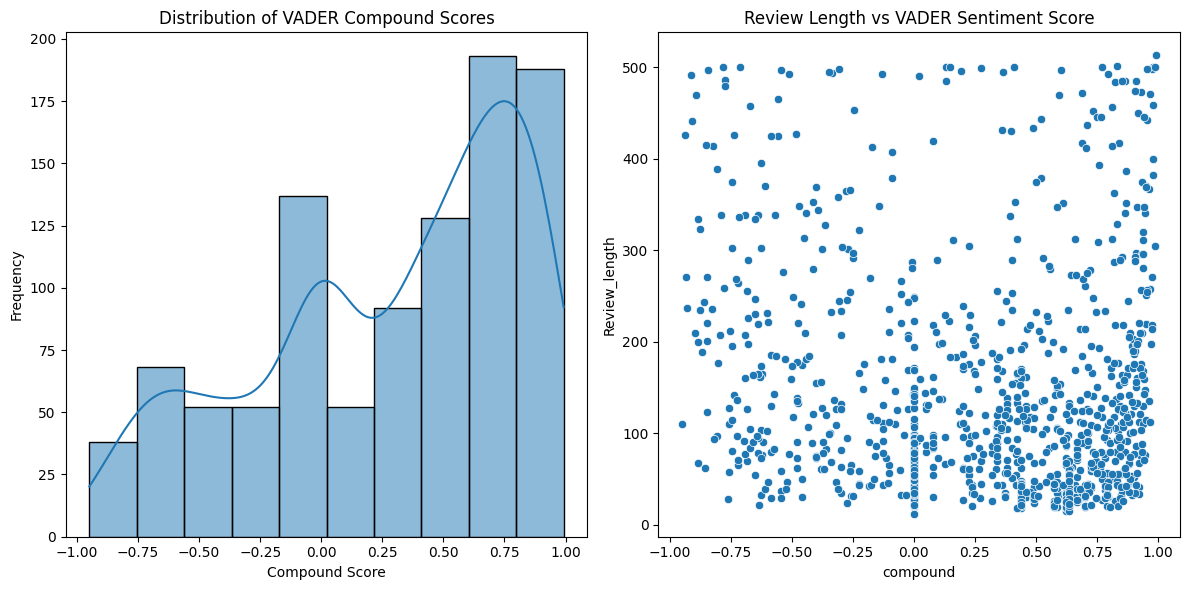

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(vaders_df['compound'], kde = True, bins = 10, ax=ax[0])
ax[0].set_title('Distribution of VADER Compound Scores')
ax[0].set_xlabel('Compound Score')
ax[0].set_ylabel('Frequency')

vaders_df['Review_length'] = vaders_df['Review'].apply(len)
sns.scatterplot(x = "compound", y = "Review_length", data=vaders_df,ax=ax[1])
ax[1].set_title('Review Length vs VADER Sentiment Score')

plt.tight_layout()
plt.show()